# Ridge Regression

## Goal

Given a dataset with continuous inputs and corresponding outputs, the objective is to find a function that matches the two as accurately as possible. This function is usually called the target function f.

In the case of a ridge regression, the idea is to modellize the target function as a linear sum of functions (that can be non linear and are generally not). Thus, with f the target function, $\phi_i$ a base function and $w_i$ its weight in the linear sum, we suppose that:
$$f(x) = \sum w_i \phi_i(x)$$

The parameter that needs to be found are then the weights $w_i$ for each base function $\phi_i$. This is done by minimizing the [root mean square error](https://en.wikipedia.org/wiki/Root-mean-square_deviation).

There is a closed solution to this problem given by the following equation, with $W$ the weight vector, $Y$ the output vector and $\Phi(X) = (\phi_0(X)^T, \phi_1(X)^T, ..., \phi_d(X)^T)$ with d the number of base functions, $\phi_0(X) = \mathbf{1}$ and $\phi_i(X) = (\phi_i(X_1), ... \phi_i(X_n))$.
$$W = (\Phi^T \Phi)^{-1} \Phi^T Y$$

## Implementation

The following implementation does exactly what is explained above and uses three different types of kernel: 
- linear $f(x) = w_0 + w_1 x$
- polynomial $f(x) = \sum_{i=0}^d w_i x^i$ with d the degree of the polynome. Notice that d = 1 gives the linear kernel
- gaussian $f(x) = \sum w_i \exp(-\frac{x - b_i}{2 \sigma^2})$ with $b_i$ define the location of the base function number $i$ (they are usually taken at random within the dataset) and $\sigma$ a parameter tuning the width of the functions.

In [1]:
# to display plots within the notebook
%matplotlib inline
# to define the size of the plotted images
from pylab import rcParams
rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.linalg import inv

from fct import normalize_pd

The X matrix correspond to the inputs and the Y matrix to the outputs to predict.

In [2]:
data = pd.read_csv('datasets/data_regression.csv')
X = data['X']
Y = data['Y']

# Normalization
X = np.asmatrix(normalize_pd(X)).T
Y = np.asmatrix(normalize_pd(Y)).T

## Linear regression

- We start by adding a column of ones to the X matrix and name the new matrix Xp (X prime).
- Then we calculate the weight as: $$W = (X^T X)^{-1} X^T Y$$
- Finally we plot the obtained function (Y_linear_reg)

In [3]:
def linear_regression(X, Y):
    # Building the Phi matrix
    Ones = np.ones((X.shape[0], 1))
    phi_X = np.hstack((Ones, X))

    # Calculating the weights
    w = np.dot(np.dot(inv(np.dot(phi_X.T, phi_X)), phi_X.T), Y)
    
    # Predicting the output values
    Y_linear_reg = np.dot(phi_X, w)

    return Y_linear_reg

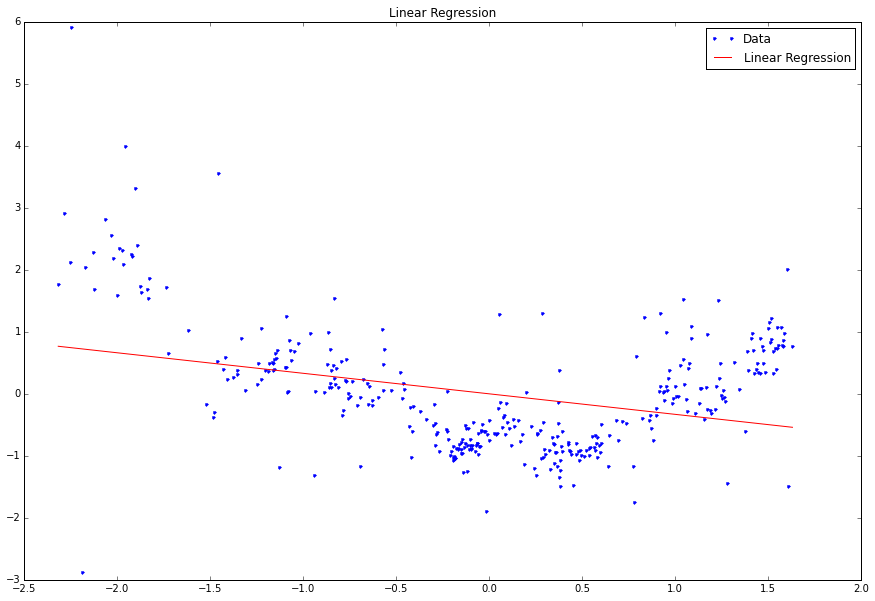

In [4]:
Y_linear_reg = linear_regression(X, Y)

plt.plot(X, Y, '.')
plt.plot(X, Y_linear_reg, 'r')
plt.title('Linear Regression')
plt.legend(['Data', 'Linear Regression'])

## Polynomial Regression

In [5]:
def polynomial_regression(X, Y, degree):
    # Building the Phi matrix
    Ones = np.ones((X.shape[0], 1))
    # Add a column of ones
    phi_X = np.hstack((Ones, X))

    # add a column of X elevated to all the powers from 2 to degree
    for i in range(2, degree + 1):
        # calculate the vector X to the power i and add it to the Phi matrix
        X_power = np.array(X) ** i
        phi_X = np.hstack((phi_X, np.asmatrix(X_power)))

    # Calculating the weights
    w = np.dot(np.dot(inv(np.dot(phi_X.T, phi_X)), phi_X.T), Y)
    
    # Predicting the output values
    Y_poly_reg = np.dot(phi_X, w)

    return Y_poly_reg

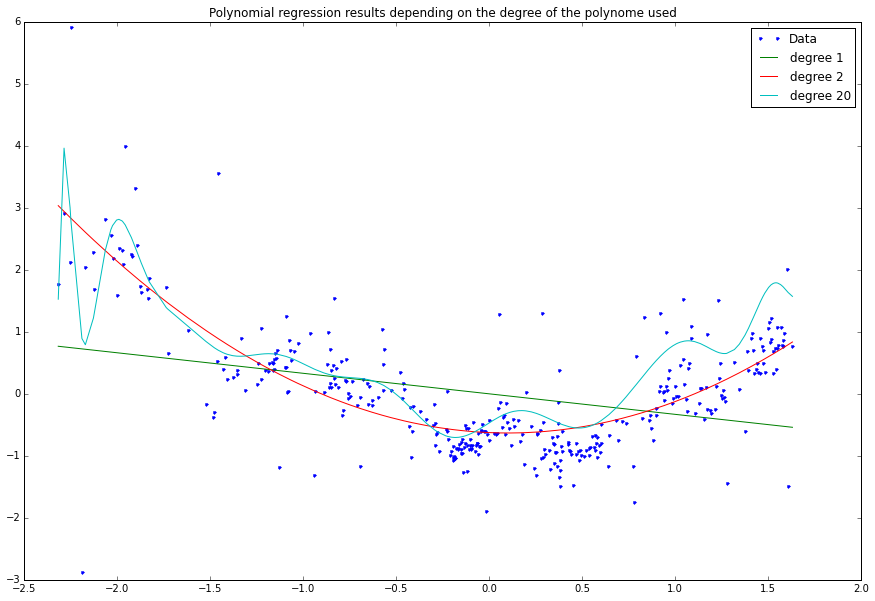

In [6]:
# Degrees to plot you can change these values to
# see how the degree of the polynom affects the 
# predicted function
degrees = [1, 2, 20]
legend = ['Data']

plt.plot(X, Y, '.')
for degree in degrees:
    Y_poly_reg = polynomial_regression(X, Y, degree)
    plt.plot(X, Y_poly_reg)
    legend.append('degree ' + str(degree))
    
plt.legend(legend)
plt.title('Polynomial regression results depending on the degree of the polynome used')

## Regression with kernel gaussian

In [7]:
def gaussian_regression(X, Y, b, sigma, return_base=True):
    """b is the number of bases to use, sigma is the variance of the
    base functions."""
    
    # Building the Phi matrix
    Ones = np.ones((X.shape[0], 1))
    # Add a column of ones
    phi_X = np.hstack((Ones, X))
    
    # Choose randomly without replacement b values from X
    # to be the center of the base functions
    X_array = np.array(X).reshape(1, -1)[0]
    bases = np.random.choice(X_array, b, replace=False)
    
    bases_function = []
    for i in range(1, b):
        base_function = np.exp(-0.5 * (((X_array - bases[i - 1] * 
                                        np.ones(len(X_array))) / sigma) ** 2))
        bases_function.append(base_function)
        phi_X = np.hstack((phi_X, np.asmatrix(base_function).T))

    w = np.dot(np.dot(inv(np.dot(phi_X.T, phi_X)), phi_X.T), Y)

    if return_base:
        return np.dot(phi_X, w), bases_function
    else:
        return np.dot(phi_X, w)

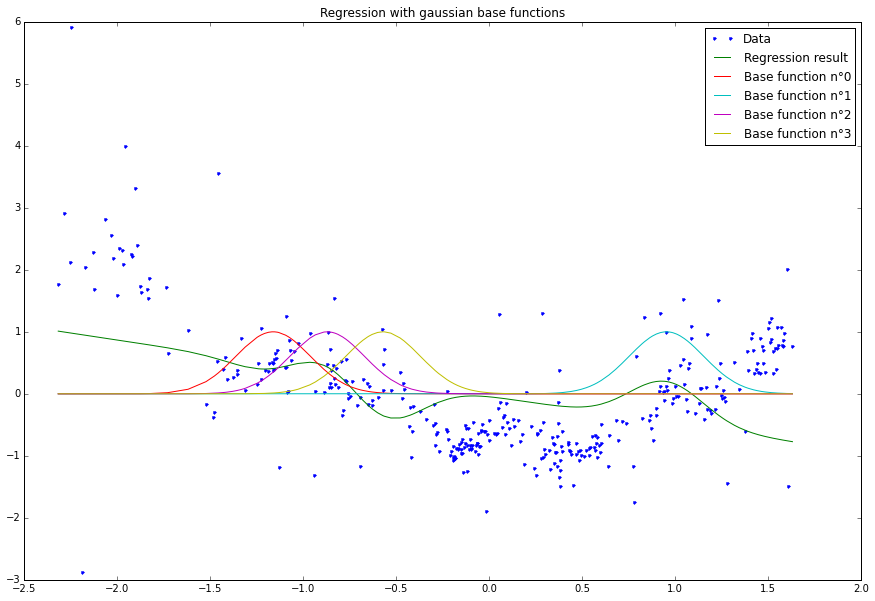

In [8]:
sigma = 0.2
Y_gauss_reg, bases_function = gaussian_regression(X, Y, 5, sigma)

plt.plot(X, Y, '.')
plt.plot(X, Y_gauss_reg)

legend = ['Data', 'Regression result']
for i, base_function in enumerate(bases_function):
    plt.plot(X, base_function)
    legend.append('Base function n°' + str(i))

plt.legend(legend)
plt.title('Regression with gaussian base functions')